In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

[[[0.00784314 0.0745098  0.05098039]
  [0.01176471 0.07058824 0.05098039]
  [0.02745098 0.07843137 0.05098039]
  ...
  [0.00392157 0.30196078 0.25098039]
  [0.         0.29803922 0.25098039]
  [0.         0.29411765 0.24705882]]

 [[0.00392157 0.07058824 0.04705882]
  [0.01176471 0.07058824 0.05098039]
  [0.02745098 0.07843137 0.05098039]
  ...
  [0.         0.29803922 0.25098039]
  [0.00392157 0.29019608 0.25490196]
  [0.00392157 0.29019608 0.25490196]]

 [[0.00784314 0.06666667 0.04705882]
  [0.02352941 0.0745098  0.04705882]
  [0.02745098 0.07843137 0.05098039]
  ...
  [0.00392157 0.29019608 0.25490196]
  [0.00392157 0.29019608 0.2627451 ]
  [0.00392157 0.29019608 0.2627451 ]]

 ...

 [[0.         0.18039216 0.15686275]
  [0.00392157 0.18823529 0.15686275]
  [0.00392157 0.18431373 0.14509804]
  ...
  [0.01960784 0.17254902 0.10196078]
  [0.02352941 0.16862745 0.10196078]
  [0.02745098 0.17254902 0.10588235]]

 [[0.         0.18431373 0.16078431]
  [0.00392157 0.18823529 0.15686275]


/Users/leeyeerun/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/leeyeerun/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


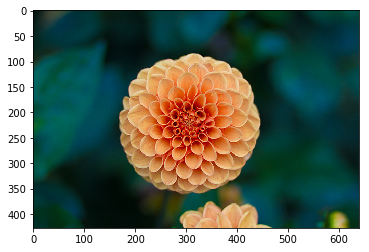

In [12]:
flower = load_sample_image('flower.jpg')
flower = np.array(flower, dtype=np.float64) / 255
plt.imshow(flower)

In [15]:
w, h, d = original_shape = tuple(flower.shape)
image_array = np.reshape(flower, (w*h, d))
image_array.shape

(273280, 3)

In [18]:
image_sample = shuffle(image_array, random_state=42)[:1000]

# Kmeans: make it 64 distinct colors
n_colors = 64
kmeans = KMeans(n_clusters=n_colors)
kmeans.fit(image_sample)

labels = kmeans.predict(image_array)

In [19]:
def reconstruct_image(cluster_centers, labels, w, h):
    d = cluster_centers.shape[1]
    image = np.zeros((w, h, d))
    label_index = 0 
    for i in range(w):
        for j in range(h):
            image[i][j] = cluster_centers[labels[label_index]]
            label_index += 1
    return image

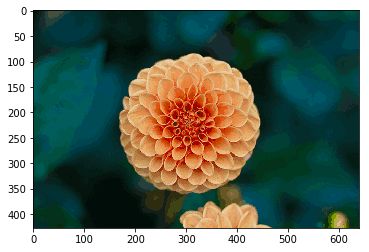

In [21]:
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h))